# Huber Regression

**Huber Regression** is a type of regression model that combines the properties of **linear regression and robust regression**. It’s particularly useful when dealing with outliers in your data. The Huber loss function is less sensitive to outliers than the standard least squares loss function used in linear regression, but it still behaves like linear regression when the errors are small.

## **Note:**  <font color='red'> Epsilon should be greater than 1.0</font>


![alt-text](images/Huber_loss.png "Huber Loss")

In [13]:
# Import necessary libraries
from sklearn.linear_model import HuberRegressor,LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Create a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# Step 2: Add some outliers to the dataset
y[::10] += 20  # Introduce large outliers every 10th sample

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Instantiate the Huber Regressor
huber_regressor = HuberRegressor(epsilon=1.35)  # epsilon is the threshold for the Huber loss

# Step 5: Fit the model to the training data
huber_regressor.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = huber_regressor.predict(X_test)

# Step 7: Evaluate the model's performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Optional: Print the learned coefficients
print("Model Coefficients:", huber_regressor.coef_)


Mean Squared Error (MSE): 119.85686388289551
Model Coefficients: [60.58823185 98.64452064 64.57093828 57.05974047 35.61001664]


# Hyperparameter tuning (with cross-validation)

In [2]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'epsilon': [1.0, 1.35, 2.0, 5.0],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(HuberRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best parameters:", grid_search.best_params_)

# Best model evaluation
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"Best Model Mean Squared Error: {mse_best}")


Best parameters: {'alpha': 0.1, 'epsilon': 1.35}
Best Model Mean Squared Error: 119.798761317783


In [26]:
X.shape, y.shape

((800, 1), (800,))

## RANSAC regressor

* RANSAC (Random Sample Consensus) is a robust regression method designed to handle datasets that contain a large proportion of outliers.
* RANSAC iteratively selects a random subset of the data, fits a model to it, and then checks how well the model fits the rest of the data.
* It considers a data point to be an inlier if it fits the model well (based on a given tolerance), and outliers are ignored during the model fitting process.

* The RANSAC regressor is useful when you have a dataset with many outliers, as it helps the model find the best fit while ignoring the outliers.

In [46]:
# Import necessary libraries
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Create a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Step 2: Add some outliers to the dataset
X[:10] += 5  # Add outliers to the data (first 10 samples)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Instantiate the RANSAC Regressor
ransac_regressor = RANSACRegressor(min_samples=50, residual_threshold=5, max_trials=100, random_state=42)

# Step 5: Fit the model to the training data
ransac_regressor.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = ransac_regressor.predict(X_test)

# Step 7: Evaluate the model's performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Optional: Print the learned coefficients and intercept
print("Model Coefficients:", ransac_regressor.estimator_.coef_)
print("Model Intercept:", ransac_regressor.estimator_.intercept_)




Mean Squared Error (MSE): 4368.939153063265
Model Coefficients: [41.80977433]
Model Intercept: 0.026299337587129656


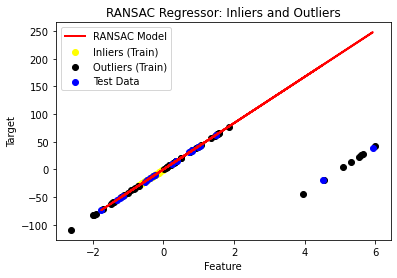

In [49]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Inlier and outlier masks for the training data (as RANSAC uses the training data to calculate inliers)
inlier_mask = ransac_regressor.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Step 2: Plotting the data and the RANSAC model
plt.scatter(X_train[inlier_mask], y_train[inlier_mask], color='yellow', label='Inliers (Train)')
plt.scatter(X_train[outlier_mask], y_train[outlier_mask], color='black', label='Outliers (Train)')

# Plot the RANSAC fitted line
plt.plot(X_test, y_pred, color='red', label='RANSAC Model', linewidth=2)

# Plot the test data
plt.scatter(X_test, y_test, color='blue', label='Test Data')

# Set labels and title
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("RANSAC Regressor: Inliers and Outliers")

# Show the legend
plt.legend()

# Display the plot
plt.show()


In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
def fit_Huber(X,y,epsilon):
    huber_regressor = HuberRegressor(epsilon=epsilon)
    huber_regressor.fit(X,y)
    coef_huber = huber_regressor.coef_ * X + huber_regressor.intercept_
    return coef_huber

def fit_OLS(X,y):
    lr = LinearRegression()
    lr.fit(X,y)
    coef_lr = lr.coef_ * X + lr.intercept_
    return coef_lr

def fit_RANSAC(X,y):
    rc = RANSACRegressor()
    rc.fit(X,y)
    yhat = rc.predict(X)
    pred = rc.estimator_.coef_*X + rc.estimator_.intercept_
    return pred

In [52]:
X, y,coef = make_regression(n_samples=800, n_features=1, n_informative=1, noise=10,coef=True, random_state=42)
X.shape, y.shape

((800, 1), (800,))

In [55]:

# Step 2: Add some outliers to the dataset
n_outliers = 50
X[:n_outliers] = 3 + 0.5*np.random.normal(size=(n_outliers,1))
y[:n_outliers] = -3 + 10*np.random.normal(size=(n_outliers))

ols = fit_OLS(X,y)
huber1 = fit_Huber(X,y,epsilon=1.5)
huber2 = fit_Huber(X,y,epsilon=3)
ransac = fit_RANSAC(X,y)

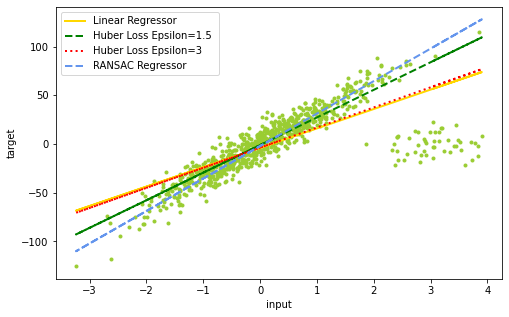

In [56]:
plt.figure(figsize=(8,5))
plt.scatter(X,y,color='yellowgreen',marker='.')
plt.plot(X,ols,label="Linear Regressor",color='gold', linestyle='solid',linewidth=2)

plt.plot(X,huber1,label="Huber Loss Epsilon=1.5 ",color='green', linestyle='dashed',linewidth=2)
plt.plot(X,huber2,label="Huber Loss Epsilon=3 ",color='red', linestyle='dotted',linewidth=2)
plt.plot(X,ransac,label="RANSAC Regressor ",color='cornflowerblue', linestyle='dashed',linewidth=2)

plt.legend(loc='upper left')
plt.xlabel("input") 
plt.ylabel('target')
plt.show()